<div style="text-align: center; font-family: 'Helvetica Neue', sans-serif; padding-top: 60px; line-height: 1.6;">

  <h1 style="color: #001F79; font-size: 24pt; font-weight: bold;">
    PROGRAMMATION ET MATHÉMATIQUES<br>
    POUR LA SCIENCE DES DONNÉES
  </h1>

  <h2 style="color: darkred; font-weight: bold; font-size: 16pt; ">Mini-projet / IFT-7021</h2>

  <br>

  <img src="logo_FSG.jpg" alt="Logo Université Laval" width="250" style="display: block; margin: auto;">

  <h3 style="color: black; font-weight: normal;">Réalisé par</h3>

  <h3 style="color: darkred; font-weight: bold; margin-top: -10px;">
    Thierry Fotchou Saadem
  </h3>

  <hr style="width: 50%; border: 1px solid darkred; margin-top: 40px;">

  <p style="color: #666; text-align: center;">Été 2025</p>

</div>


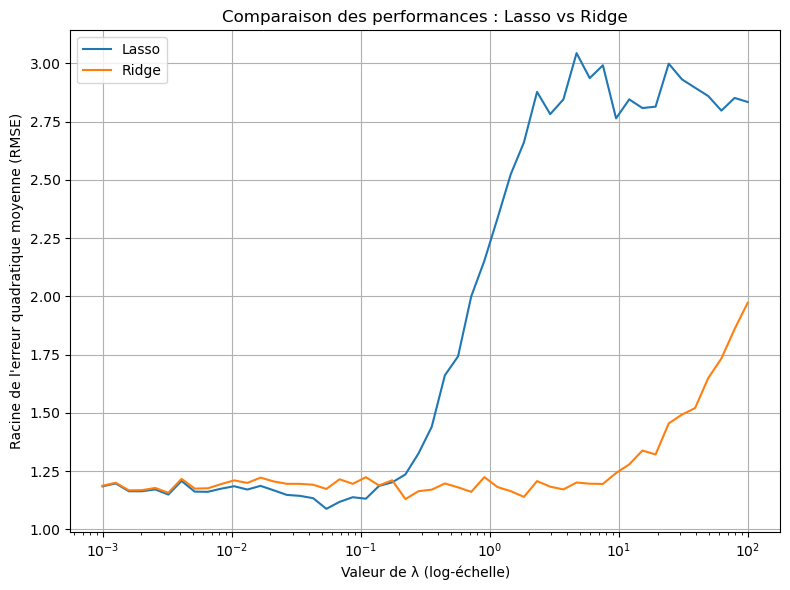

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Fixer la graine aléatoire
np.random.seed(5)

def generate_data(n=100, p=20, k=8, sigma=1.0):
    """
    Génère un jeu de données synthétique pour un problème de régression linéaire.
    - n : nombre d’observations
    - p : nombre total de variables
    - k : nombre de variables réellement informatives (non nulles)
    - sigma : écart-type du bruit
    """
    X = np.random.randn(n, p)
    beta = np.zeros(p)
    beta[:k] = np.random.randn(k)
    y = X @ beta + np.random.normal(0, sigma, n)
    return X, y, beta

# Plage de valeurs de lambda
lambdas = np.logspace(-3, 2, 50)
rmse_lasso, rmse_ridge = [], []

# Moyenne sur 50 répétitions pour chaque lambda
for lam in lambdas:
    lasso_scores, ridge_scores = [], []
    for _ in range(50):
        X, y, _ = generate_data()
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
        
        lasso = Lasso(alpha=lam, max_iter=10000).fit(X_train, y_train)
        ridge = Ridge(alpha=lam).fit(X_train, y_train)

        lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso.predict(X_test)))
        ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge.predict(X_test)))

        lasso_scores.append(lasso_rmse)
        ridge_scores.append(ridge_rmse)
    
    rmse_lasso.append(np.mean(lasso_scores))
    rmse_ridge.append(np.mean(ridge_scores))

# Tracé
plt.figure(figsize=(8, 6))
plt.plot(lambdas, rmse_lasso, label="Lasso")
plt.plot(lambdas, rmse_ridge, label="Ridge")
plt.xscale("log")
plt.xlabel("Valeur de λ (log-échelle)")
plt.ylabel("Racine de l'erreur quadratique moyenne (RMSE)")
plt.title("Comparaison des performances : Lasso vs Ridge")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("figure_ridge_lasso.png")
plt.show()
